# Filtering Out Drop‑Outs: Udacity AB Test on Time‑Commitment Reminder  

Udacity A/B‑tested a quick **“this course takes real time”** reminder displayed right before the two enrollment options.  
The goal was to see if this heads‑up would discourage casual learners from starting the 14‑day credit‑card trial, while still letting anyone grab the free videos and quizzes.  
In short, it’s a reality‑check nudge aimed at reducing churn and keeping the cohort full of committed students.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [ ]:
# Load the AB test dataset 

data_url =  'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Udacity%20AB%20testing%20data/AB_test_clicks.csv'
ABtest = pd.read_csv(data_url, skipinitialspace=True)

# Displaying the shape and preview for the first few rows
print(f"Dataset Shape: {ABtest_data.shape}")
print("Preview of the Data:")
print(ABtest_data.head())

Dataset Shape: (999, 10)
Preview of the Data:
          Date  C-Pageviews  C-Clicks  C-Enrollments  C-Payments  E-Pageviews  \
0  Sat, Oct 11       7723.0     687.0          134.0        70.0       7716.0   
1  Sun, Oct 12       9102.0     779.0          147.0        70.0       9288.0   
2  Mon, Oct 13      10511.0     909.0          167.0        95.0      10480.0   
3  Tue, Oct 14       9871.0     836.0          156.0       105.0       9867.0   
4  Wed, Oct 15      10014.0     837.0          163.0        64.0       9793.0   

   E-Clicks  E-Enrollments  E-Payments  Unnamed: 9  
0     686.0          105.0        34.0         NaN  
1     785.0          116.0        91.0         NaN  
2     884.0          145.0        79.0         NaN  
3     827.0          138.0        92.0         NaN  
4     832.0          140.0        94.0         NaN  


In [ ]:
# Analyze the Experiment Group Distribution
# Count the frequency of each experiment group 
print("\nExperiment Group Distribution:")
group_counts = ABtest['Group'].value_counts(normalize = True)
print(group_counts)

# Analyze Click Frequency
click_counts = ABtest['Click'].value_counts()
print (click_counts)


Experiment Group Distribution:
Group
Control       0.50064
Experiment    0.49936
Name: proportion, dtype: float64
Click
0    633500
1     56703
Name: count, dtype: int64


In [ ]:
# Joint Distribution of Group vs Click
# Create a contingency table to analyze the joint distribution

joint = pd.crosstab(index = ABtest ['Group'], columns = ABtest ['Click'])
print("\nJoint Distribution (Group vs Click):")
print(joint)




Joint Distribution (Group vs Click):
Click            0      1
Group                    
Control     317165  28378
Experiment  316335  28325


In [ ]:
# Marginal Distribution with totals 

marginal_distr = pd.crosstab(
    index = ABtest ['Group'], columns = ABtest ['Click'], margins = True
)
print ("Marginal Distribution with Totals:")
print(marginal_distr)

Marginal Distribution with Totals:
Click            0      1     All
Group                            
Control     317165  28378  345543
Experiment  316335  28325  344660
All         633500  56703  690203



Conditional Distribution (Normalized):
Click               0         1
Group                          
Control     91.787419  8.212581
Experiment  91.781756  8.218244


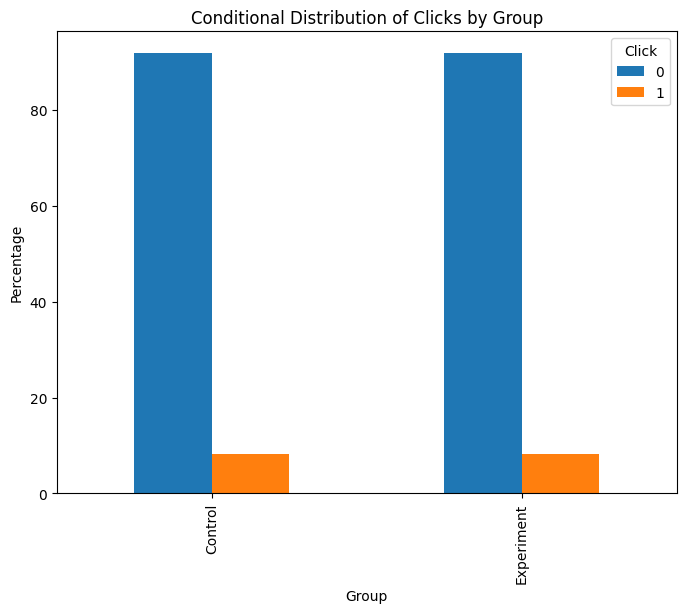

In [ ]:
# Conditional distribution, normalize by rows, converted to percentages

conditional_distr = pd.crosstab(
    index = ABtest ['Group'], columns = ABtest ['Click'], normalize = 'index'
) * 100
print("\nConditional Distribution (Normalized):")
print(conditional_distr)

# Visualizing Conditional Distribution

conditional_distr.plot(kind="bar", figsize=(8, 6))
plt.title("Conditional Distribution of Clicks by Group")
plt.ylabel("Percentage")
plt.xlabel("Group")
plt.legend(title="Click")
plt.show()


In [22]:
# Chi-Square Test of Independence

g,p, dof, expctd = chi2_contingency(joint)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {g}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results:
Chi-Square Statistic: 0.006606036478633042
p-value: 0.9352212452988706
Degrees of Freedom: 1


In [23]:
# Check statistical significance

# If the p-value is less than 0.05, reject the null hypothesis and conclude that the variables are dependent
if p < 0.05:
    print("There is a significant relationship between the group and the click variable.")
else:
    print("There is no significant relationship between the group and the click variable.")


There is no significant relationship between the group and the click variable.
